In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore

In [ ]:
all_data =  pd.read_csv('/content/GSE168285count_df.csv', low_memory=False)
meta_data = pd.read_csv('/content/GSE168285_sample_meta_data.txt', sep='\t', low_memory=False)
gene_anno = pd.read_csv('/content/GSE168285_gene_annotation.txt', sep='\t', low_memory=False)
# data = all_data.loc[:,['Gene name', 'Cell line', 'nTPM']] #extracting gene name, cell line and modified TPM (transcript per million) value
all_data = all_data.T # now genes are on the rows and samples on the columns

In [ ]:
print(all_data.head())

                 NAFT18012_P1A1_D14_49_S18  NAFT18012_P1A2_D14_50_S21  \
Genes                                                                   
ENSG00000000003                2944.778135                1634.217442   
ENSG00000000005                   0.000000                   0.000000   
ENSG00000000419                 527.037429                 772.669252   
ENSG00000000457                 398.926206                 346.856458   
ENSG00000000460                  68.166509                  72.191028   

                 NAFT18012_P1A3_D14_51_S1  NAFT18012_P1A4_D14_52_S4  \
Genes                                                                 
ENSG00000000003               1412.904924               2257.966784   
ENSG00000000005                  0.000000                  0.000000   
ENSG00000000419                712.132353                733.656531   
ENSG00000000457                294.883591                322.908092   
ENSG00000000460                 46.262508                 54.8

In [ ]:
print(meta_data.head())

                           X                 sampleName     condition  \
0  NAFT18012_P1A1_D14_49_S18  NAFT18012_P1A1_D14_49_S18  Lean_control   
1  NAFT18012_P1A2_D14_50_S21  NAFT18012_P1A2_D14_50_S21  Lean_control   
2   NAFT18012_P1A3_D14_51_S1   NAFT18012_P1A3_D14_51_S1  Lean_control   
3   NAFT18012_P1A4_D14_52_S4   NAFT18012_P1A4_D14_52_S4   Fat_control   
4   NAFT18012_P1A5_D14_53_S7   NAFT18012_P1A5_D14_53_S7   Fat_control   

  treatment   batch   NPC Background  Number_of_cues Combination_name  
0      Lean  batch1  high       lean               0          Control  
1      Lean  batch1  high       lean               0          Control  
2      Lean  batch1  high       lean               0          Control  
3       Fat  batch1  high        fat               0          Control  
4       Fat  batch1  high        fat               0          Control  


In [ ]:
cutoff = 50000
high_genes = np.zeros((58333, 1), bool)
for i in range(len(all_data.index)):
  if all_data.iloc[i,:].max() >= cutoff:
    high_genes[i] = True
max_in_genes = all_data.max()

In [ ]:
import sys
sys.setrecursionlimit(100000)
high_genes = high_genes.flatten()
print(sum(high_genes == True))
filter_data = all_data.loc[high_genes,:]
# sns.clustermap(filter_data, cmap='RdBu_r', center=0, vmin=-3, vmax=3)

97


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


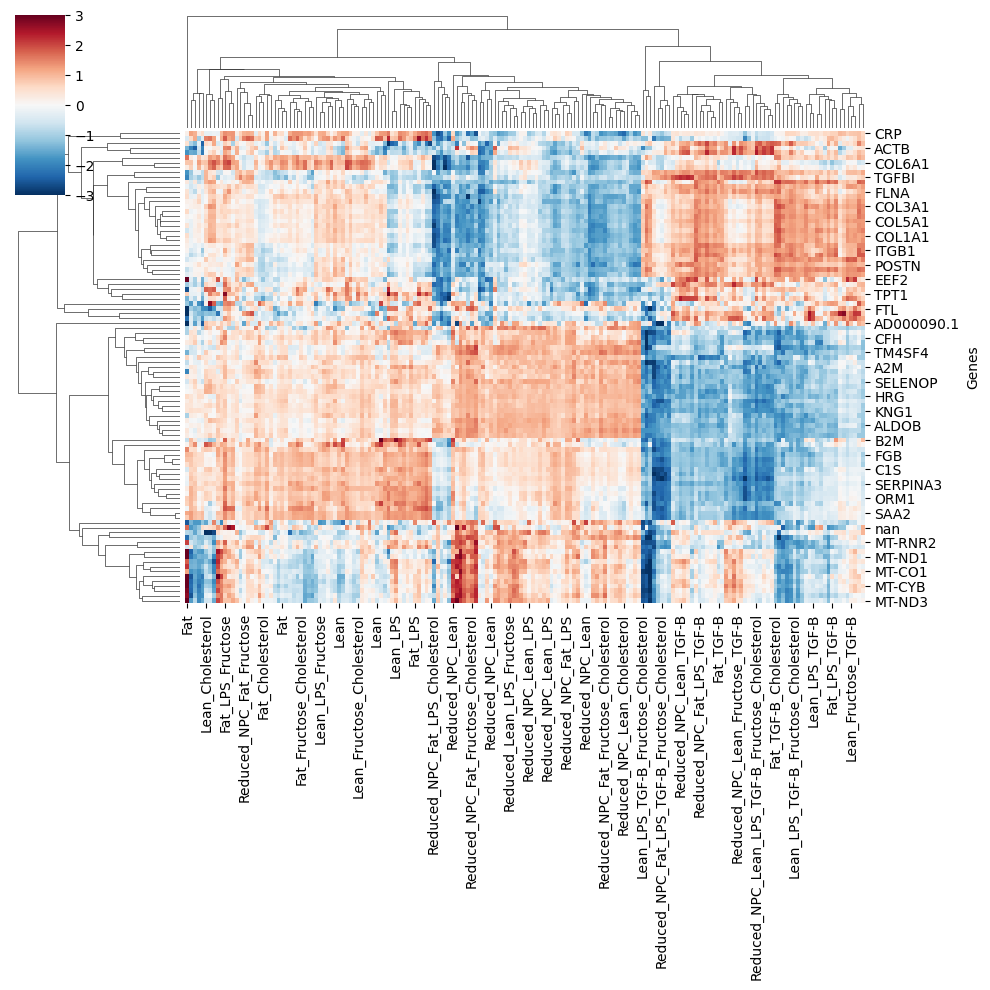

In [ ]:
dataTable_transformed = np.log1p(all_data) # log2 transform the data
dataTable_transformed_scaled = zscore(dataTable_transformed, axis=1) #z-score data
# since we have transformed the data, the genes are now on the columns instead of the rows. this is why we pass in axis=1

# rename rows and columns to gene symbols and the conditions
mapping_dict = dict(zip(meta_data['sampleName'], meta_data['treatment']))
dataTable_transformed_scaled.rename(columns=mapping_dict, inplace=True)
mapping_dict = dict(zip(gene_anno['EnsemblAcc'], gene_anno['GeneSymbol']))
dataTable_transformed_scaled.rename(index=mapping_dict, inplace=True)

sns.clustermap(dataTable_transformed_scaled.loc[high_genes,:], cmap='RdBu_r', center=0, vmin=-3, vmax=3)